In [9]:
import pandas as pd                               
import numpy as np                                
import tensorflow as tf                           
from tensorflow import keras                      
from tensorflow.keras.models import Sequential    
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout  
from tensorflow.keras.optimizers import Adam      
from keras.preprocessing import image             
from keras.preprocessing.image import ImageDataGenerator  
import matplotlib.pyplot as plt                  
from google.colab import files                   

Found 8011 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


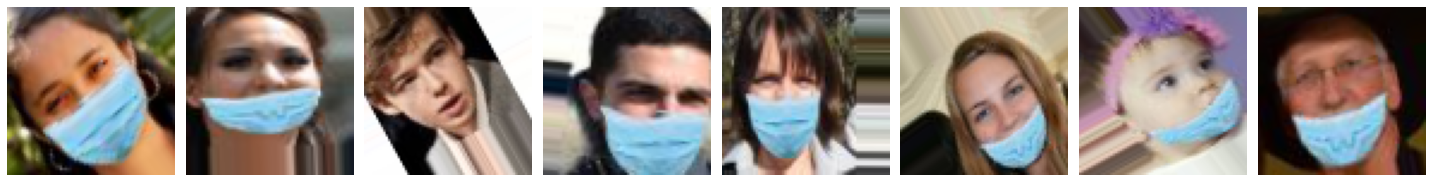

[0. 1. 1. 0. 0. 1. 1. 1.]


In [10]:
batch_size = 8
epochs = 30

#örnek resimleri eğitim ve test olarak ayrıştırıyoruz.
directory = 'ornek_resimler'
train_datagen = ImageDataGenerator(validation_split=0.2,        
                                   rescale = 1./255,            
                                   rotation_range=40,           
                                   width_shift_range=0.2,     
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')        

train_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               
                                class_mode = 'binary',
                                seed=2020,                     
                                subset = 'training')            

validation_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               
                                class_mode = 'binary',
                                subset = 'validation')           

imgs, labels = next(train_generator)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

#0: maskeli, 1:maskesiz şekilde plotluyoruz.
plotImages(imgs);
print(labels);



In [11]:
#modelimizi oluşturalım.
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    Dense(units=1, activation='sigmoid'), 

])

model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator ,epochs = epochs,validation_data= validation_generator)
#modelimizi eğitiyoruz.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

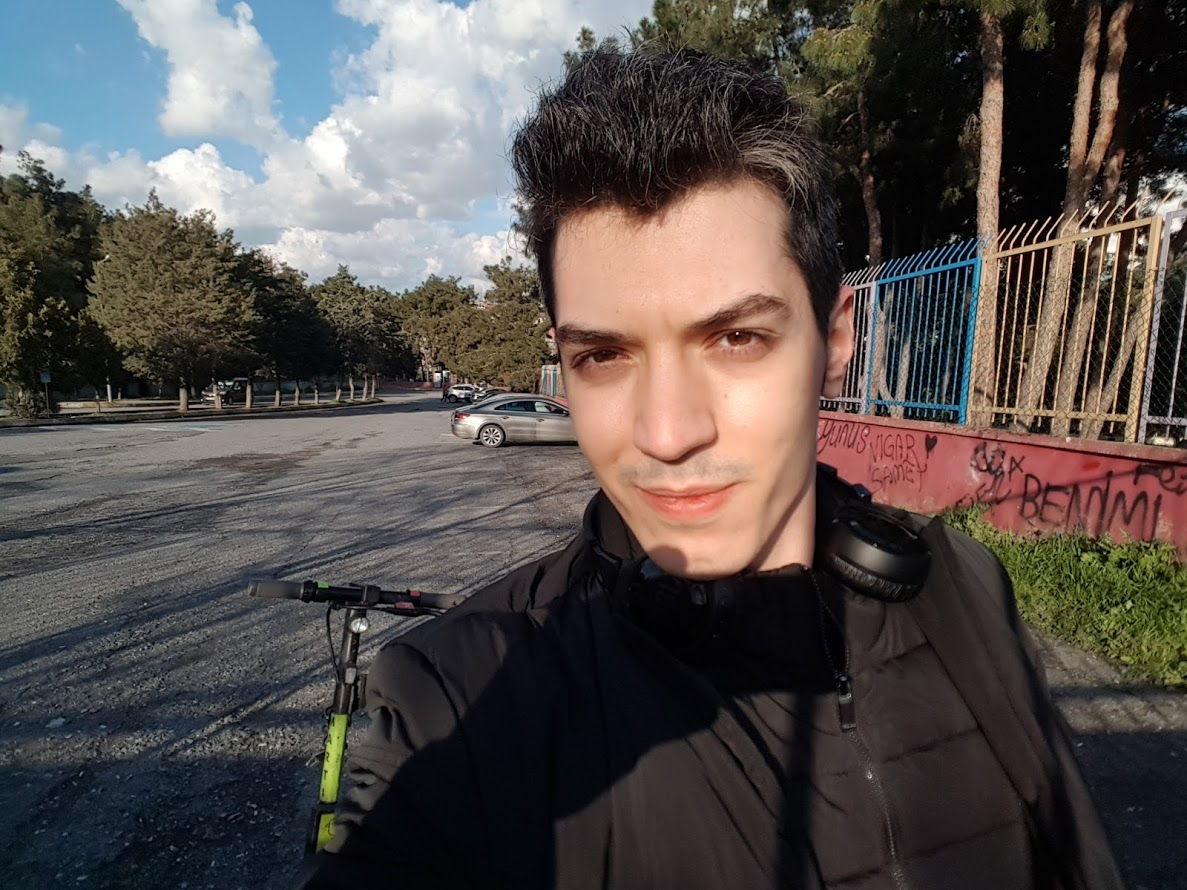



Maske Takılmamış!
------------------------------



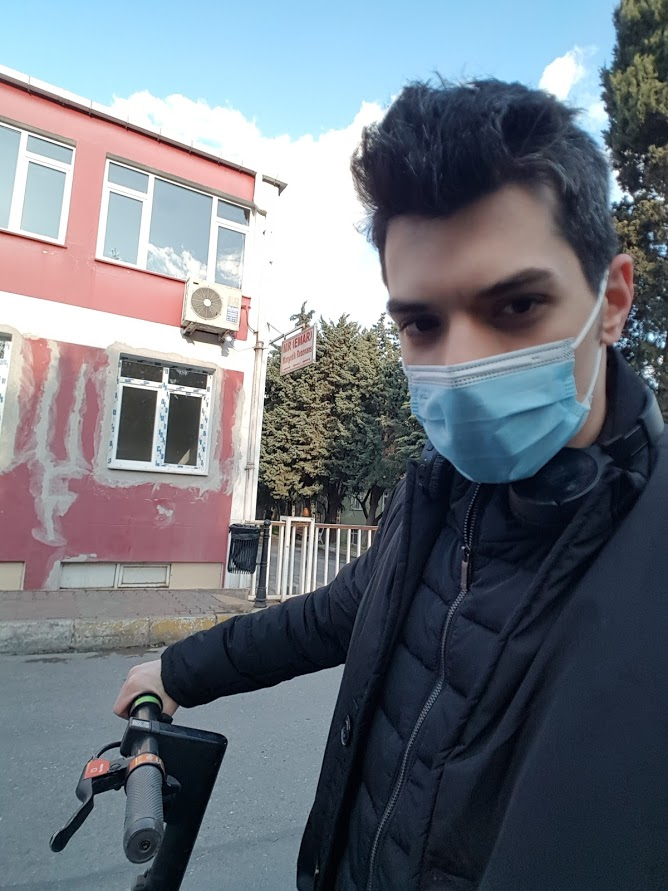



Maske Takılmış.
------------------------------



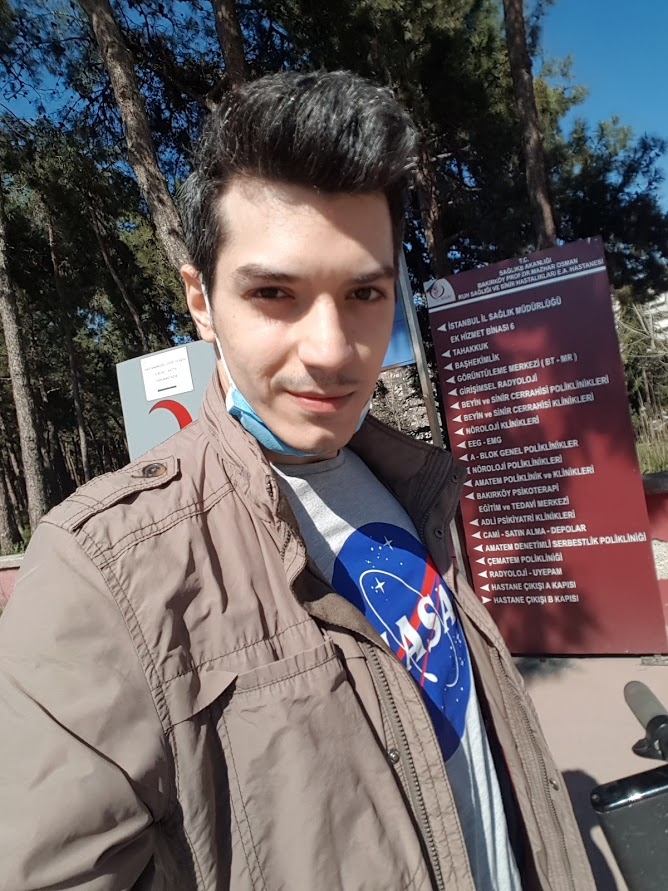



Maske Takılmamış!
------------------------------



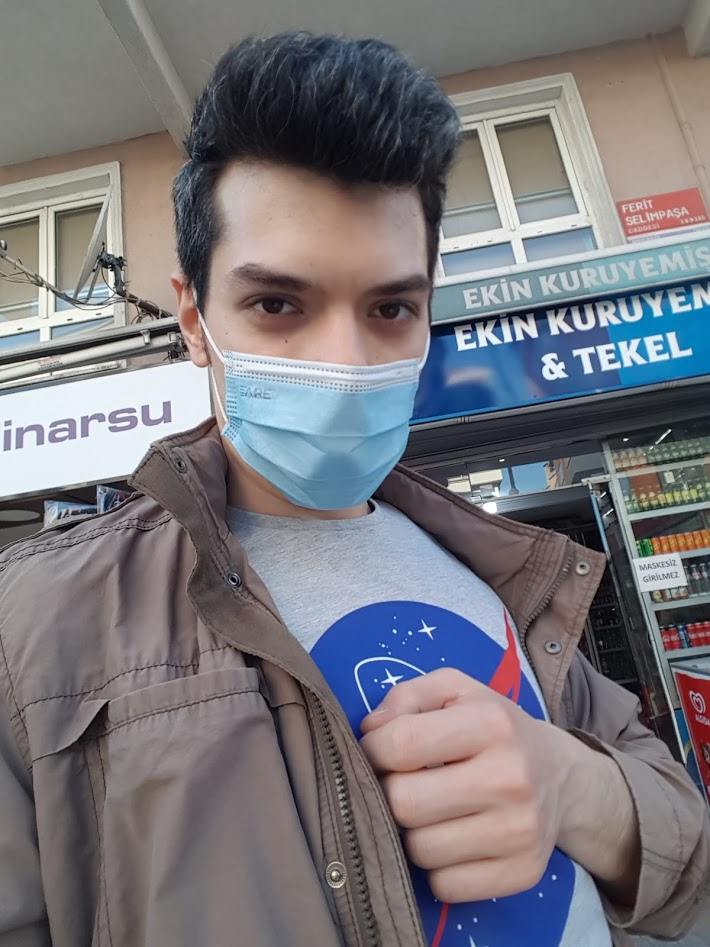



Maske Takılmamış!
------------------------------



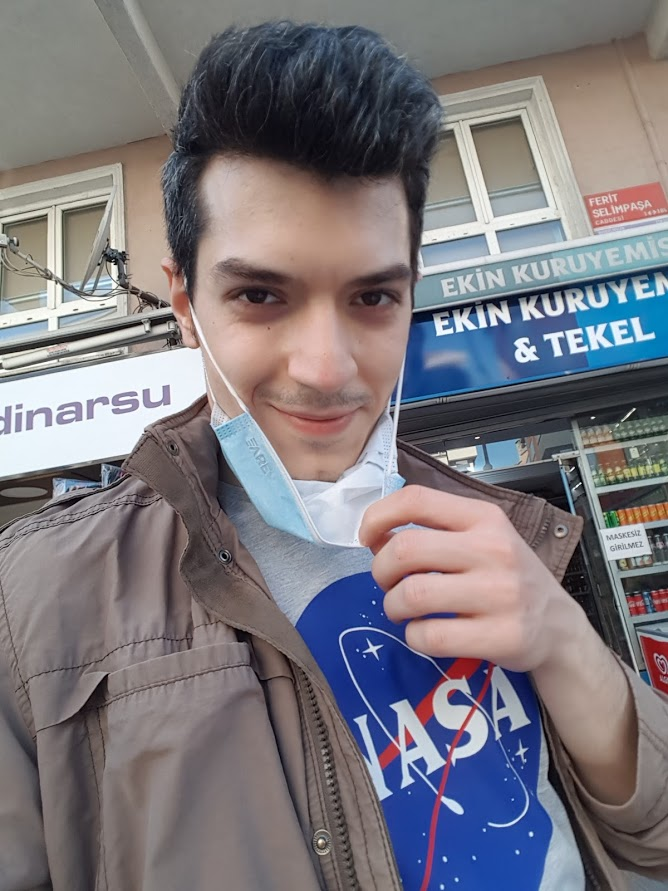



Maske Takılmamış!
------------------------------



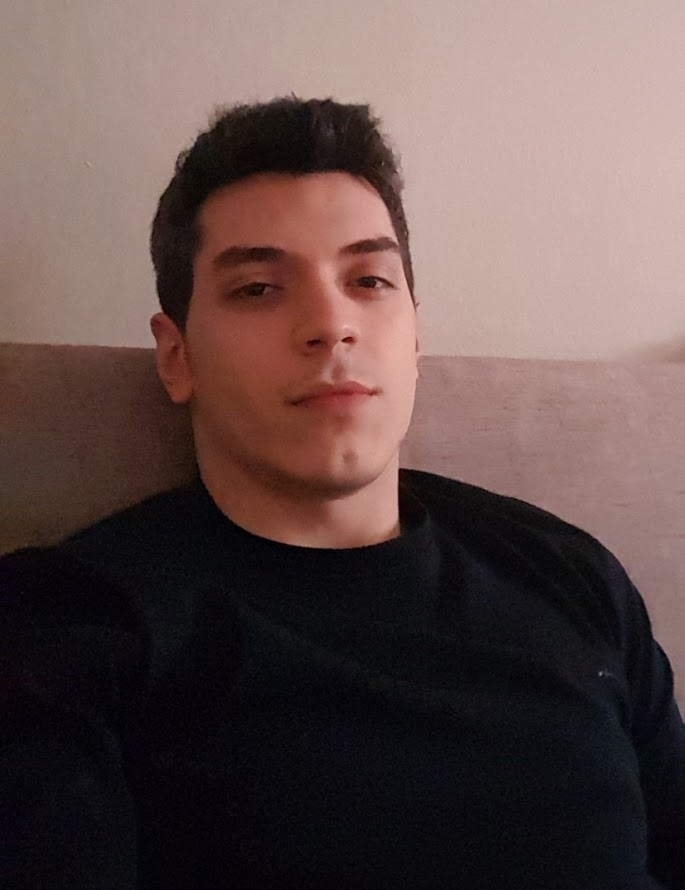



Maske Takılmamış!
------------------------------



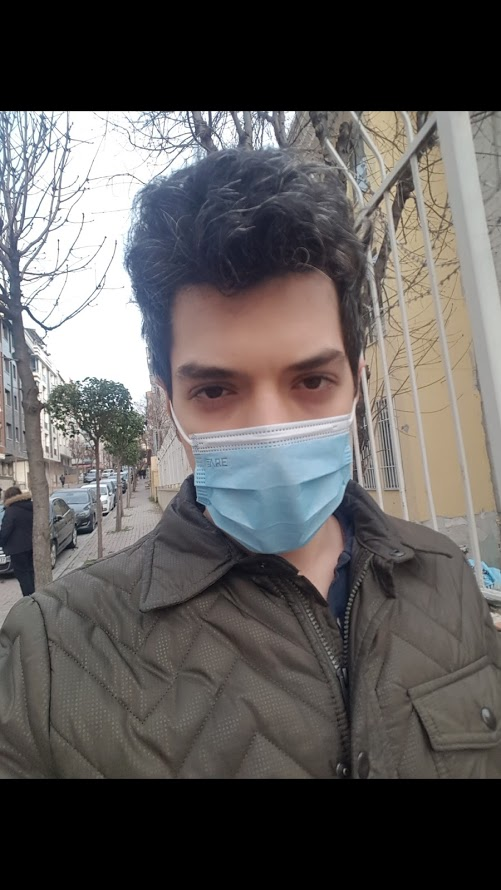



Maske Takılmamış!
------------------------------



In [18]:
from IPython.display import Image, display
for i in range (1,8):
  img_directory = str(i) + '.jpg'
  img_pred = image.load_img(img_directory, target_size = (70, 70))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)

  prediction = model.predict(img_pred)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  if(int(prediction[0][0]) == 0):
    print("Maske Takılmış.")
  else:
    print("Maske Takılmamış!")
  print("------------------------------\n")